In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mwgcs import Einasto, NFW

from scipy.special import gammainc, gamma

Gravitree path added to sys.path.


In [2]:
alpha, Rs, logScaleDensity = 0.21843818618281016, 48.786037801033935, 4.787921615549889
rvir, cvir, mvir = 271.9943, 11.534417, 1137285800000.0

In [3]:
def nfw_density_profile(r, r_vir, c, M_vir):
    
    # Scale radius
    r_s = r_vir / c
    
    # Define the characteristic density rho_0
    rho_0 = M_vir / (4 * np.pi * r_s**3 * (np.log(1 + c) - c / (1 + c)))
    
    # Calculate the density profile
    rho_r = rho_0 / ((r / r_s) * (1 + r / r_s)**2)
    
    return rho_r

In [4]:
from scipy.integrate import quad

In [5]:
_tmp = lambda r: r**2 * nfw_density_profile(r, rvir, cvir, mvir)
m_enc = quad(_tmp, 0., rvir / cvir)

In [8]:
np.log10(m_enc[0])

10.03619225483555

In [9]:
einasto = Einasto(alpha, Rs, logScaleDensity)
nfw = NFW(mvir, rvir, cvir)

In [ ]:
r = np.logspace(-1, 2, 1000)

ein_pot = [einasto.potential(np.array([r_i, 0., 0.])) for r_i in r]
ein_rho = [einasto.density(r_i) for r_i in r]
ein_hess = [einasto.hessian(r_i)[0, 0] for r_i in r]

nfw_pot = [nfw.potential(np.array([r_i, 0., 0.])) for r_i in r]
nfw_rho = [nfw.density(r_i) for r_i in r]
nfw_hess = [nfw.hessian(r_i)[0, 0] for r_i in r]


In [ ]:
from gala.potential import NFWPotential
from gala.units import galactic
import astropy.units as u

# mvir * u.Msun vs actual scale mass
nfw_gala = NFWPotential(mvir * u.Msun, rvir, units=galactic)
# nfw_gala = NFWPotential.from_circular_velocity(166.99 * (u.km/u.s), 58.548714 * u.kpc, units=galactic)

nfw_gala_hess = [nfw_gala.hessian([r_i, 0., 0.,])[0,0].to(u.Gyr**(-2)) for r_i in r]
nfw_gala_pot = [nfw_gala([r_i, 0., 0.]).to((u.km/u.s)**(2)) for r_i in r]
nfw_gala_rho = [nfw_gala.density([r_i, 0., 0.]).to(u.Msun/u.kpc**3) for r_i in r]

In [ ]:
fig, ax = plt.subplots()
ax.plot(r, ein_rho, c='blue', label='ein')
ax.plot(r, np.array(nfw_rho), c='orange', label='nfw')
ax.plot(r, nfw_gala_rho, c='purple', label='nfw gala')
ax.set_yscale('symlog')
ax.set_xscale('log')

ax.set_ylabel(r'$\rho (r) \mathrm{\, [M_\odot / kpc^3]}$ ')
ax.set_xlabel(r'$r$ [kpc]')

ax.legend()
plt.show()

In [ ]:
nfw_rho / nfw_gala_rho

In [ ]:
ein_hess = [einasto.potential(r_i)[0, 0] for r_i in r]
nfw_hess = [nfw.potential(r_i)[0, 0] for r_i in r]

# 0. commensurate gala and our implementation
# 1. plot first derivatives
# 2. amplitude of einasto fit

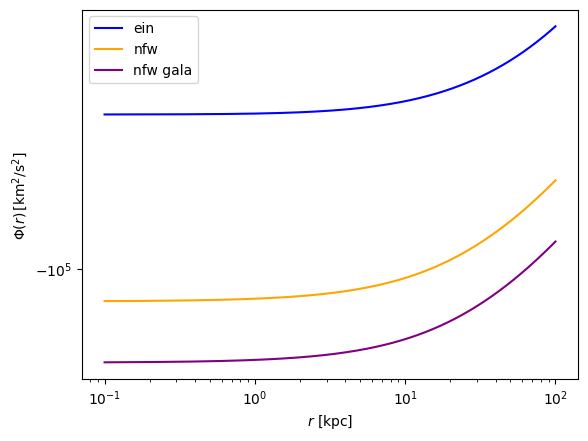

In [13]:
fig, ax = plt.subplots()
ax.plot(r, ein_pot, c='blue', label='ein')
ax.plot(r, nfw_pot, c='orange', label='nfw')
ax.plot(r, nfw_gala_pot, c='purple', label='nfw gala')
ax.set_yscale('symlog')
ax.set_xscale('log')

ax.set_ylabel(r'$\Phi (r) \mathrm{\, [km^2 / s^2]}$ ')
ax.set_xlabel(r'$r$ [kpc]')

ax.legend()
plt.show()

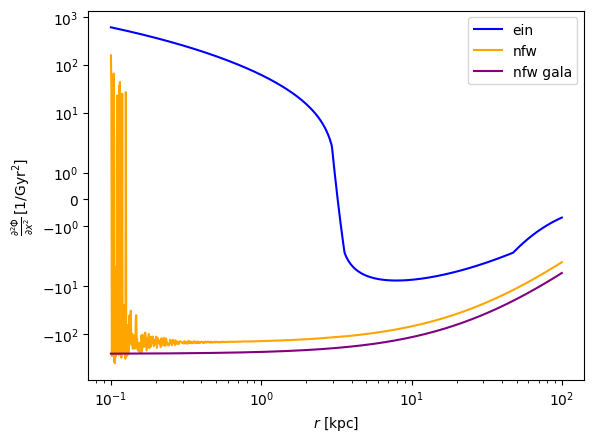

In [14]:
fig, ax = plt.subplots()
ax.plot(r, ein_hess, c='blue', label='ein')
ax.plot(r, nfw_hess, c='orange', label='nfw')
ax.plot(r, nfw_gala_hess, c='purple', label='nfw gala')
ax.set_yscale('symlog')
ax.set_xscale('log')

ax.set_ylabel(r'$\frac{\partial^2 \Phi}{\partial x^2} \mathrm{\, [1 / Gyr^2]}$ ')
ax.set_xlabel(r'$r$ [kpc]')

ax.legend()
plt.show()